<a href="https://colab.research.google.com/github/kretchmar/CS339_2023/blob/main/MLP_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Layer Perceptron on MNIST
### Two Layer FF Neural Network to classify two MNIST digits
Matt Kretchmar <p>
March 2023 <p>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data
We extract from the MNIST data two categories: digits "0" and digits "1"
We create new testing, cross validation and training sets containing only these samples from the first two categories. 

In [59]:
from keras.datasets import mnist
(x_train,y_train), (x_test,y_test) = mnist.load_data()

# isolate "0" in training samples
print("\n\nExtracting Training Data")
cat0 = y_train == 0
xt0 = x_train[cat0]
yt0 = y_train[cat0]

# isolate "1" in training samples
cat1 = y_train == 1
xt1 = x_train[cat1]
yt1 = y_train[cat1]

x_train = np.concatenate((xt0,xt1),axis=0)
y_train = np.concatenate((yt0,yt1),axis=0)


# isolate "0" in testing samples
print("\n\nExtracting Testing Data")
cat0 = y_test == 0
xt0 = x_test[cat0]
yt0 = y_test[cat0]

# isolate "1" in training samples
cat1 = y_test == 1
xt1 = x_test[cat1]
yt1 = y_test[cat1]

x_test = np.concatenate((xt0,xt1),axis=0)
y_test = np.concatenate((yt0,yt1),axis=0)



# randomly shuffle order of training and testing sets
n = len(y_train)
perm = np.arange(n)
np.random.shuffle(perm)
x_train = x_train[perm]
y_train = y_train[perm]

n = len(y_test)
perm = np.arange(n)
np.random.shuffle(perm)
x_test = x_test[perm]
y_test = y_test[perm]

# use first 2000 samples from training set as cross validation set
x_cross = x_train[:2000]
x_train = x_train[2000:]
y_cross = y_train[:2000]
y_train = y_train[2000:]


print("\n\nFinal Data sizes")
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_cross:",x_cross.shape)
print("y_cross:",y_cross.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)

# show first 10 outputs from y_train and y_test
print("\n\nFirst 10 targets from each set")
print("y_train:",y_train[:10])
print("y_cross:",y_cross[:10])
print("y_test:",y_test[:10])









Extracting Training Data


Extracting Testing Data


Final Data sizes
x_train: (10665, 28, 28)
y_train: (10665,)
x_cross: (2000, 28, 28)
y_cross: (2000,)
x_test: (2115, 28, 28)
y_test: (2115,)


First 10 targets from each set
y_train: [1 0 0 0 0 1 0 1 0 1]
y_cross: [1 1 1 0 0 0 0 1 0 0]
y_test: [0 0 1 1 1 0 1 1 1 1]


In [60]:
# Let's display two of the images so we can see what they look like
from PIL import Image
image1 = x_train[0]
print(image1.dtype)
print(image1[:10,:30])

print("\n\nImage 0")
im = Image.fromarray(image1)
im.show()

print("\n\nImage 3")
image1 = x_train[3]
im = Image.fromarray(image1)
im.show()


uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  31 195 131   9   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  29 190 254 123   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  13 183 254 139   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 212 



Image 3


In [61]:
# normalize inputs to [0,1] range
x_train, x_cross, x_test = x_train/255.0, x_cross/255.0, x_test/255.0

# Neural Network Model
We try a two layer perceptron with the following parameters:
- Input layer (flattened 28x28)
- Hidden layer 100 Relu units


In [62]:
import tensorflow as tf

# set random seed to fixed value for reproducibility
tf.random.set_seed(42)

model = tf.keras.Sequential()
# specify input shape
model.add(tf.keras.layers.Input(shape=[28,28]))
# flatten input from 28,28 to 784
model.add(tf.keras.layers.Flatten())
# first hidden layer learning 100 features
model.add(tf.keras.layers.Dense(100,activation='relu'))
# second hidden layer learning 30 deep features
model.add(tf.keras.layers.Dense(30,activation='relu'))
# output layer of single unit with sigmoid activation
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dense_9 (Dense)             (None, 30)                3030      
                                                                 
 dense_10 (Dense)            (None, 1)                 31        
                                                                 
Total params: 81,561
Trainable params: 81,561
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [64]:
history = model.fit(x_train,y_train,epochs=30,validation_data=(x_cross,y_cross))

Epoch 1/30
334/334 [==============================] - 3s 5ms/step - loss: 0.0189 - accuracy: 0.9959 - val_loss: 0.0179 - val_accuracy: 0.9965
Epoch 2/30
334/334 [==============================] - 2s 5ms/step - loss: 0.0041 - accuracy: 0.9985 - val_loss: 0.0064 - val_accuracy: 0.9990
Epoch 3/30
334/334 [==============================] - 2s 5ms/step - loss: 0.0016 - accuracy: 0.9994 - val_loss: 0.0067 - val_accuracy: 0.9990
Epoch 4/30
334/334 [==============================] - 2s 5ms/step - loss: 0.0011 - accuracy: 0.9995 - val_loss: 0.0084 - val_accuracy: 0.9990
Epoch 5/30
334/334 [==============================] - 2s 5ms/step - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.0082 - val_accuracy: 0.9990
Epoch 6/30
334/334 [==============================] - 2s 6ms/step - loss: 6.9090e-04 - accuracy: 0.9998 - val_loss: 0.0062 - val_accuracy: 0.9990
Epoch 7/30
334/334 [==============================] - 3s 8ms/step - loss: 0.0011 - accuracy: 0.9995 - val_loss: 0.0089 - val_accuracy: 0.9980
Ep

## Interpretting Training
We can see two conclusions from the above data
1. This model is probably too complex (too sophisticated) for the task.  We can see that very good learning is achieved almost immediately.  We should probably try again with a smaller model.
2. We have slightly over-fit the data.  The cross validation loss is minimal after 2 epochs.  We should have stopped training then.  

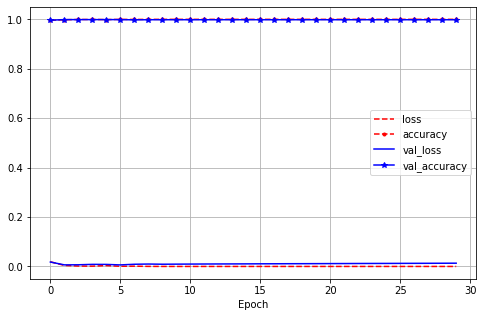

In [65]:
# plotting history
pd.DataFrame(history.history).plot(figsize=(8,5),grid=True,xlabel='Epoch',style=['r--','r--.','b-','b-*'])
plt.show()

In [66]:
model.evaluate(x_test,y_test)

67/67 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 0.9995


[0.0043656788766384125, 0.9995272159576416]

In [77]:
y_predict = model.predict(x_test)
y_predict = y_predict[:,0]
y_out = np.where(y_predict > 0.5,1,0)

misses = (~np.equal(y_test,y_out)).astype(int)
miss_idx = np.flatnonzero(misses)
print('miss indices =',miss_idx)

print('y_test:',y_test[559:569])
print('y_out :',y_out[559:569])

print("\n\nImage 559")
image1 = x_test[559].reshape(28,28) * 255.0 
im = Image.fromarray(image1.astype('uint8'))
im.show()


67/67 [==============================] - 1s 8ms/step
miss indices = [559]
y_test: [0 1 1 0 0 1 1 1 0 1]
y_out : [1 1 1 0 0 1 1 1 0 1]


Image 559


## Model 2
This model is much too complex for such a simple task.  Let's try a smaller model.    


---




In [69]:
# set random seed to fixed value for reproducibility
tf.random.set_seed(42)

model2 = tf.keras.Sequential()
# specify input shape
model2.add(tf.keras.layers.Input(shape=[28,28]))
# flatten input from 28,28 to 784
model2.add(tf.keras.layers.Flatten())
# first hidden layer learning 100 features
model2.add(tf.keras.layers.Dense(30,activation='relu'))
# output layer of single unit with sigmoid activation
model2.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 30)                23550     
                                                                 
 dense_12 (Dense)            (None, 1)                 31        
                                                                 
Total params: 23,581
Trainable params: 23,581
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
334/334 [==============================] - 2s 4ms/step - loss: 2.8318e-05 - accuracy: 1.0000 - val_loss: 0.0155 - val_accuracy: 0.9975
Epoch 2/10
334/334 [==============================] - 1s 4ms/step - loss: 6.2176e-06 - accuracy: 1.0000 - val_loss: 0.0131 - val_accuracy: 0.9985
Epoch 3/10
334/334 [==============================] - 2s 4ms/step - loss: 5.7013e-04 - accuracy: 0.9999 - val_loss: 0.0130 - val_accuracy: 0.9985
Epoch 4/10
334/334 [==============================] - 2s 5ms/step - loss: 3.3673e-06 - accuracy: 1.0000 - val_loss: 0.0125 - val_accuracy: 0.9985
Epoch 5/10
334/334 [==============================] - 2s 6ms/step - loss: 2.3257e-06 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy: 0.9985
Epoch 6/10
334/334 [==============================] - 1s 4ms/step - loss: 1.8442e-06 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy: 0.9985
Epoch 7/10
334/334 [==============================] - 1s 4ms/step - loss: 1.5590e-06 - accuracy: 1.0000 - val_loss: 0.0125 -

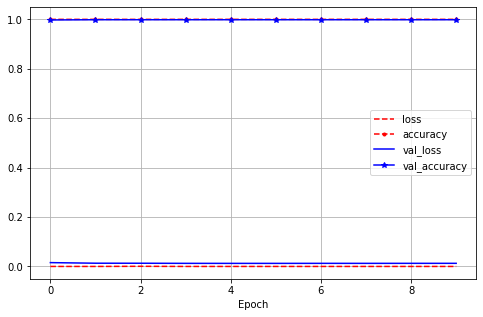

In [72]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model2.fit(x_train,y_train,epochs=10,validation_data=(x_cross,y_cross))
pd.DataFrame(history.history).plot(figsize=(8,5),grid=True,xlabel='Epoch',style=['r--','r--.','b-','b-*'])
plt.show()


In [73]:
model2.evaluate(x_test,y_test)

67/67 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 0.9991


[0.0023377735633403063, 0.9990543723106384]

In [76]:
y_predict = model2.predict(x_test)
y_predict = y_predict[:,0]
y_out = np.where(y_predict > 0.5,1,0)
misses = (~np.equal(y_test,y_out)).astype(int)
miss_idx = np.flatnonzero(misses)
print('miss indices =',miss_idx)

print('y_test:',y_test[1556:1566])
print('y_out :',y_out[1556:1566])

print("\n\nImage 1556")
image1 = x_test[1556].reshape(28,28) * 255.0 
im = Image.fromarray(image1.astype('uint8'))
im.show()

67/67 [==============================] - 0s 2ms/step
miss indices = [ 559 1556]
y_test: [1 0 1 0 1 0 1 0 1 1]
y_out : [0 0 1 0 1 0 1 0 1 1]


Image 1556


## Summary
We can build a two layer neural network with only 30 hidden units that achieves 99.9% classification accuracy on the test set.   